In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
img = cv2.imread(r'.\testimage\virat.jpg')
img.shape

(1513, 1200, 3)

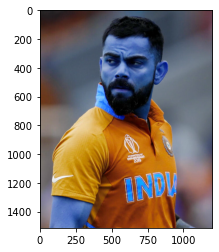

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
gray.shape

(1513, 1200)

In [7]:
gray

array([[ 38,  38,  38, ...,  74,  74,  74],
       [ 38,  38,  38, ...,  74,  74,  74],
       [ 38,  38,  38, ...,  74,  74,  74],
       ...,
       [ 93,  93,  93, ..., 114, 114, 114],
       [ 92,  92,  92, ..., 114, 114, 114],
       [ 93,  93,  93, ..., 113, 113, 113]], dtype=uint8)

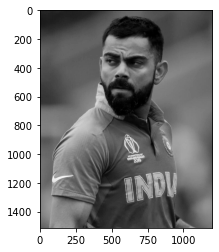

In [8]:
plt.imshow(gray , cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray , 1.3 , 5)
faces

array([[350, 180, 464, 464]])

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(350, 180, 464, 464)

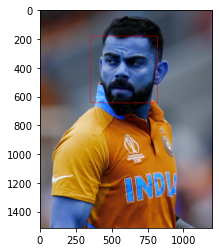

In [11]:
face_img = cv2.rectangle(img , (x,y) , (x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

<function matplotlib.pyplot.show(close=None, block=None)>

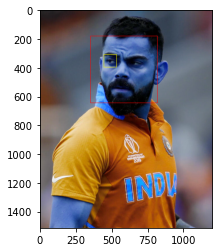

In [12]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img , (x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h , x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color , (ex,ey),(ex+ew,ey+eh),(255,255,0),2)
    
plt.figure()
plt.imshow(face_img , cmap='gray')
plt.show

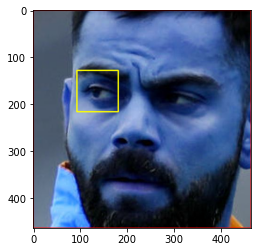

In [13]:
%matplotlib inline
plt.imshow(roi_color , cmap='gray')

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

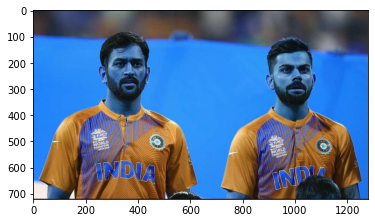

In [15]:
original_image = cv2.imread(r'.\testimage\virat_ms.jpg')
plt.imshow(original_image)

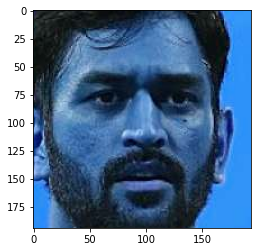

In [16]:
cropped_image = get_cropped_image_if_2_eyes(r'.\testimage\virat_ms.jpg')
plt.imshow(cropped_image)

In [17]:
path_to_data = r"./dataset/"
path_to_cr_data = r"./dataset/cropped/"

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./dataset/bale',
 './dataset/benzema',
 './dataset/cropped',
 './dataset/messi',
 './dataset/neymar',
 './dataset/ronaldo']

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        try:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = path_to_cr_data + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder:" , cropped_folder)
                    
                cropped_file_name = celebrity_name+str(count)+".png"
                cropped_file_path = cropped_folder + "/"+cropped_file_name
                
                cv2.imwrite(cropped_file_path , roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count+=1
        except:
            print("Error ....\n\n")

bale
Generating cropped images in folder: ./dataset/cropped/bale
Error ....


benzema
Generating cropped images in folder: ./dataset/cropped/benzema
cropped
Error ....


Error ....


messi
Generating cropped images in folder: ./dataset/cropped/messi
Error ....


Error ....


neymar
Generating cropped images in folder: ./dataset/cropped/neymar
Error ....


Error ....


Error ....


ronaldo
Generating cropped images in folder: ./dataset/cropped/ronaldo
Error ....




In [21]:
# Copied from stack overflow

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

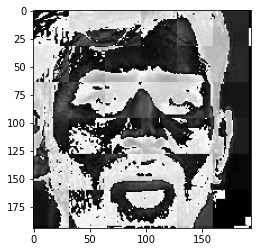

In [23]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [25]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'bale': 0, 'benzema': 1, 'cropped': 2, 'messi': 3, 'neymar': 4, 'ronaldo': 5}

In [27]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [28]:
len(X)

246

In [31]:
X = np.array(X).reshape(len(X) , 4096).astype(float)
X.shape

(246, 4096)

In [32]:
X[0]

array([108., 112., 171., ..., 216.,  28., 112.])